<a href="https://colab.research.google.com/github/olcaykursun/ML/blob/main/Spring2024/softmax_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
scaler = StandardScaler() #z-score normalization
iris.data = scaler.fit_transform(iris.data)

encoder = OneHotEncoder(sparse_output=False)
target_reshaped = iris.target.reshape(-1, 1)
target_one_hot = encoder.fit_transform(target_reshaped)

N = iris.data.shape[0] #number of rows
D = iris.data.shape[1] #number of columns

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
target_one_hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
import pandas as pd

pd.DataFrame(iris.data).describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [ ]:
def build_model(my_learning_rate):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=3, input_shape=(D,)))
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate), loss="categorical_crossentropy", metrics=['accuracy'])
  return model

In [ ]:
def plot_the_loss_curve(epochs, loss):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Loss")

  plt.plot(epochs, loss, label="Loss")
  plt.legend()
  plt.ylim([loss.min()*0.97, loss.max()*1.03])
  plt.show()

Epoch 1/100
  1/120 [..............................] - ETA: 15s - loss: 1.6041 - accuracy: 0.0000e+00

2024-03-02 20:19:41.204005: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


120/120 [==============================] - 1s 10ms/step - loss: 1.0269 - accuracy: 0.5500 - val_loss: 1.4006 - val_accuracy: 0.0000e+00
Epoch 2/100
120/120 [==============================] - 1s 9ms/step - loss: 0.4838 - accuracy: 0.8250 - val_loss: 0.8854 - val_accuracy: 0.3333
Epoch 3/100
120/120 [==============================] - 1s 9ms/step - loss: 0.3584 - accuracy: 0.8917 - val_loss: 0.6408 - val_accuracy: 0.6333
Epoch 4/100
120/120 [==============================] - 1s 9ms/step - loss: 0.3016 - accuracy: 0.9333 - val_loss: 0.5567 - val_accuracy: 0.6667
Epoch 5/100
120/120 [==============================] - 1s 9ms/step - loss: 0.2652 - accuracy: 0.9333 - val_loss: 0.5455 - val_accuracy: 0.6667
Epoch 6/100
120/120 [==============================] - 1s 8ms/step - loss: 0.2396 - accuracy: 0.9500 - val_loss: 0.5406 - val_accuracy: 0.6667
Epoch 7/100
120/120 [==============================] - 1s 9ms/step - loss: 0.2174 - accuracy: 0.9500 - val_loss: 0.4528 - val_accuracy: 0.7000
Epoch 

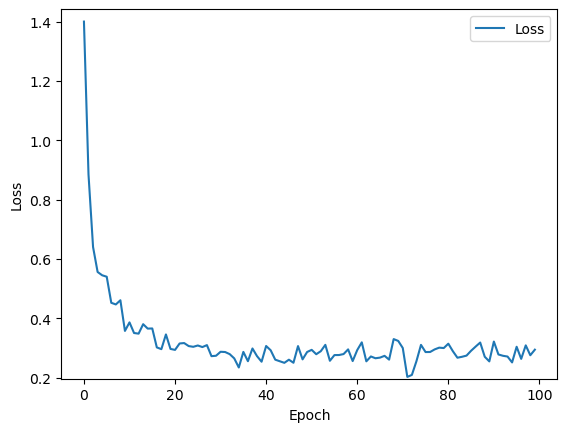

In [ ]:
learning_rate = 0.01

model = build_model(learning_rate)
history = model.fit(x=iris.data,
                    y=target_one_hot,
                    batch_size=1,
                    epochs=100, verbose=1, validation_split=0.2)
epochs = history.epoch
hist = pd.DataFrame(history.history)

plot_the_loss_curve(epochs, hist["val_loss"])


In [ ]:
hist

,loss,accuracy,val_loss,val_accuracy
0,1.367777,0.291667,0.543621,0.933333
1,0.482754,0.833333,0.581275,0.666667
2,0.358083,0.900000,0.529153,0.666667
3,0.298238,0.941667,0.547610,0.666667
4,0.259423,0.950000,0.510658,0.666667
...,...,...,...,...
95,0.027184,0.991667,0.324114,0.833333
96,0.027460,0.991667,0.330533,0.833333
97,0.027313,0.991667,0.321361,0.833333
98,0.027526,1.000000,0.305737,0.833333


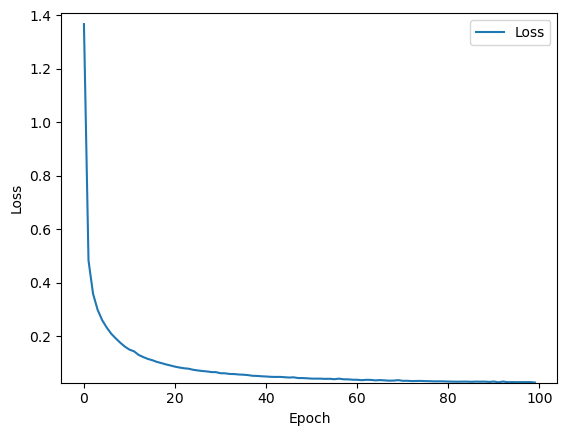

In [ ]:
plot_the_loss_curve(epochs, hist["loss"])


In [ ]:
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[-2.278,  1.558,  0.161],
        [ 3.769,  0.318, -1.61 ],
        [-6.749, -1.468,  4.782],
        [-7.129, -2.702,  6.179]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(3,) dtype=float32, numpy=array([-2.272,  5.354, -5.489], dtype=float32)>]

In [ ]:
y_pred = model.predict(iris.data)

np.set_printoptions(precision=3, suppress=True)
print(np.hstack((y_pred, target_one_hot)))


5/5 [==============================] - 0s 3ms/step
[[1.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    1.    0.    0.   ]
 [1.    0.   

In [ ]:
print(y_pred[::10])


[[1.    0.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    0.999 0.001]
 [0.    0.713 0.287]
 [0.    1.    0.   ]
 [0.    0.997 0.003]
 [0.    0.    1.   ]
 [0.    0.198 0.802]
 [0.    0.002 0.998]
 [0.    0.021 0.979]
 [0.    0.    1.   ]]


In [ ]:
weights, biases = model.layers[-1].get_weights()

old_weights = weights.copy()
old_biases = biases.copy()

w = weights[:,0].copy()
for i in range(3):
  print(weights[:,i])
  weights[:,i] -= w
  print(weights[:,i])

w0 = biases[0]
for i in range(3):
  biases[i] -= w0

model.layers[-1].set_weights([weights, biases])

[-2.379  3.944 -7.432 -7.559]
[0. 0. 0. 0.]
[ 1.536  0.487 -1.468 -3.538]
[ 3.915 -3.457  5.964  4.021]
[ 0.069 -1.531  4.483  5.443]
[ 2.449 -5.475 11.916 13.002]


In [ ]:
y_pred = model.predict(iris.data)
print(y_pred[::10])


5/5 [==============================] - 0s 1ms/step
[[1.    0.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    0.999 0.001]
 [0.    0.713 0.287]
 [0.    1.    0.   ]
 [0.    0.997 0.003]
 [0.    0.    1.   ]
 [0.    0.198 0.802]
 [0.    0.002 0.998]
 [0.    0.021 0.979]
 [0.    0.    1.   ]]


In [ ]:
for i in range(4):
    print(weights[i,0])

print()
for i in range(4):
    print(old_weights[i,0])


0.0
0.0
0.0
0.0

-2.3792088
3.9443243
-7.432352
-7.5591006


In [ ]:
# weights now hold the overall importance score for class 1 vs class 0

for i in range(4):
    print(weights[i,1])

print()
for i in range(4):
    print(old_weights[i,1])


3.9153464
-3.457369
5.9642363
4.0208373

1.5361376
0.48695508
-1.4681158
-3.5382633


In [ ]:
# weights now hold the overall importance score for class 2 vs class 0

for i in range(4):
    print(weights[i,2])

print()
for i in range(4):
    print(old_weights[i,2])


2.4486442
-5.4751487
11.915834
13.002045

0.069435306
-1.5308245
4.483482
5.442944


In [ ]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(units=3, input_shape=(D,)))
model2.set_weights(model.get_weights())
y_pred = model2.predict(iris.data)
print(y_pred[::10]) #log-odds

odds = np.exp(y_pred[::10])
print(f'{odds=}')

np.divide(odds, np.sum(odds, axis=1, keepdims=True))

5/5 [==============================] - 0s 2ms/step
[[  0.    -12.56  -43.86 ]
 [  0.    -12.389 -44.814]
 [  0.     -9.324 -39.678]
 [  0.    -10.122 -38.355]
 [  0.    -12.844 -43.123]
 [  0.     16.38    8.446]
 [  0.     10.257   2.663]
 [  0.     13.617  12.705]
 [  0.     10.992   2.848]
 [  0.     11.963   6.102]
 [  0.     22.492  32.739]
 [  0.     18.539  19.94 ]
 [  0.     24.059  30.325]
 [  0.     28.853  32.713]
 [  0.     24.096  32.026]]
odds=array([[1.000e+00, 3.510e-06, 8.947e-20],
       [1.000e+00, 4.162e-06, 3.448e-20],
       [1.000e+00, 8.927e-05, 5.861e-18],
       [1.000e+00, 4.020e-05, 2.202e-17],
       [1.000e+00, 2.642e-06, 1.871e-19],
       [1.000e+00, 1.299e+07, 4.654e+03],
       [1.000e+00, 2.848e+04, 1.434e+01],
       [1.000e+00, 8.201e+05, 3.294e+05],
       [1.000e+00, 5.938e+04, 1.726e+01],
       [1.000e+00, 1.569e+05, 4.470e+02],
       [1.000e+00, 5.862e+09, 1.654e+14],
       [1.000e+00, 1.126e+08, 4.569e+08],
       [1.000e+00, 2.809e+10, 1.47

array([[1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.999, 0.001],
       [0.   , 0.713, 0.287],
       [0.   , 1.   , 0.   ],
       [0.   , 0.997, 0.003],
       [0.   , 0.   , 1.   ],
       [0.   , 0.198, 0.802],
       [0.   , 0.002, 0.998],
       [0.   , 0.021, 0.979],
       [0.   , 0.   , 1.   ]], dtype=float32)

In [ ]:
pd.DataFrame(iris.data).describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [ ]:
model.predict([[2,1,2,.5]])

1/1 [==============================] - 0s 25ms/step


array([[0.   , 0.339, 0.661]], dtype=float32)

In [ ]:
model2.predict([[2,1,2,.5]])

1/1 [==============================] - 0s 25ms/step


array([[ 0.   , 26.084, 26.752]], dtype=float32)

In [ ]:
model.predict([[3,1,2,.5]]) #create an example to adjust the winner, reminds me of adversarial examples of GANs

1/1 [==============================] - 0s 27ms/step


array([[0.  , 0.69, 0.31]], dtype=float32)

In [ ]:
model2.predict([[3,1,2,.5]]) #create an example to adjust the winner, reminds me of adversarial examples of GANs

1/1 [==============================] - 0s 17ms/step


array([[ 0.   , 30.   , 29.201]], dtype=float32)